In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os
import cv2
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten
import copy
import pickle

# Importing data

## Test data

In [2]:
def data_import(data_path):
    class_labels = os.listdir(data_path) # reads directory names as class-labels
    data=[]
    labels=[]
    for class_ in class_labels:
        if class_ == '.DS_Store':
            continue
        class_path = data_path+'/'+class_
        imgs = os.listdir(class_path) # reads images names to read
        for img in imgs:
            if img == '.DS_Store':
                continue
            data.append(cv2.imread(class_path+'/'+img, cv2.IMREAD_GRAYSCALE))
            labels.append(int(class_))

    return np.array(data), np.array(labels)

In [3]:
test_path='./Group_10/test'
train_path='./Group_10/train'
val_path='./Group_10/val'
# test_data, test_labels = data_import(test_path)
# train_data, train_labels = data_import(train_path)
# val_data, val_labels = data_import(val_path)

# with open('test_data', mode='wb') as f:
#     pickle.dump(test_data, f)
# with open('train_data', mode='wb') as f:
#     pickle.dump(train_data, f)
# with open('val_data', mode='wb') as f:
#     pickle.dump(val_data, f)

# with open('test_labels', mode='wb') as f:
#     pickle.dump(test_labels, f)
# with open('train_labels', mode='wb') as f:
#     pickle.dump(train_labels, f)
# with open('val_labels', mode='wb') as f:
#     pickle.dump(val_labels, f)

with open('test_data', mode='rb') as f:
    test_data = pickle.load(f)
with open('train_data', mode='rb') as f:
    train_data = pickle.load(f)
with open('val_data', mode='rb') as f:
    val_data = pickle.load(f)

with open('test_labels', mode='rb') as f:
    test_labels = pickle.load(f)
with open('train_labels', mode='rb') as f:
    train_labels = pickle.load(f)
with open('val_labels', mode='rb') as f:
    val_labels = pickle.load(f)

print('Summary of data')
print(f'No. of train images: {len(train_data)}')
print(f'No. of test images: {len(test_data)}')
print(f'No. of val images: {len(val_data)}')


Summary of data
No. of train images: 11385
No. of test images: 3795
No. of val images: 3795


# Model

In [4]:
initializer = keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=6)

In [5]:
# Three layer FCNN
model_3 = keras.Sequential([
    Flatten(input_shape=(28,28), name='Input_layer'), # image data as input
    Dense(250, activation='sigmoid', kernel_initializer=initializer, bias_initializer=keras.initializers.Zeros(), name='Hidden_layer_1'),
    Dense(500, activation='sigmoid', kernel_initializer=initializer, bias_initializer=keras.initializers.Zeros(), name='Hidden_layer_2'),
    Dense(250, activation='sigmoid', kernel_initializer=initializer, bias_initializer=keras.initializers.Zeros(), name='Hidden_layer_3'),
    Dense(10, kernel_initializer=initializer, bias_initializer=keras.initializers.Zeros(), activation='softmax', name='Output')
], name='FCNN_3layer')

In [6]:
model_3.summary()

Model: "FCNN_3layer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Flatten)       (None, 784)               0         
                                                                 
 Hidden_layer_1 (Dense)      (None, 250)               196250    
                                                                 
 Hidden_layer_2 (Dense)      (None, 500)               125500    
                                                                 
 Hidden_layer_3 (Dense)      (None, 250)               125250    
                                                                 
 Output (Dense)              (None, 10)                2510      
                                                                 
Total params: 449,510
Trainable params: 449,510
Non-trainable params: 0
_________________________________________________________________


In [7]:
earlystopping = keras.callbacks.EarlyStopping(monitor='loss', min_delta=1e-4, patience=3)
# modelCheckpoints = keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5')
sgd_optimizer = keras.optimizers.SGD(learning_rate=0.001,name='SGD', momentum=0)
model_3.compile(optimizer=sgd_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
history = model_3.fit(x=train_data, y=train_labels, batch_size=1, epochs=100_000,
                    callbacks=[earlystopping], shuffle=True,
                    verbose=1,
                    validation_split=0.0, validation_data=(val_data, val_labels), validation_batch_size=None)

Epoch 1/100000
    1/11385 [..............................] - ETA: 35:42 - loss: 1.8071 - accuracy: 0.0000e+00

2023-03-15 19:37:23.411097: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


11385/11385 [==============================] - 8s 684us/step - loss: 1.4980 - accuracy: 0.4233 - val_loss: 1.1762 - val_accuracy: 0.7286
Epoch 2/100000
11385/11385 [==============================] - 8s 697us/step - loss: 0.7094 - accuracy: 0.8622 - val_loss: 0.3808 - val_accuracy: 0.9404
Epoch 3/100000
11385/11385 [==============================] - 8s 686us/step - loss: 0.2687 - accuracy: 0.9479 - val_loss: 0.1983 - val_accuracy: 0.9534
Epoch 4/100000
11385/11385 [==============================] - 8s 666us/step - loss: 0.1655 - accuracy: 0.9594 - val_loss: 0.1439 - val_accuracy: 0.9621
Epoch 5/100000
11385/11385 [==============================] - 8s 678us/step - loss: 0.1316 - accuracy: 0.9652 - val_loss: 0.1263 - val_accuracy: 0.9639
Epoch 6/100000
11385/11385 [==============================] - 8s 673us/step - loss: 0.1138 - accuracy: 0.9685 - val_loss: 0.1128 - val_accuracy: 0.9668
Epoch 7/100000
11385/11385 [==============================] - 8s 677us/step - loss: 0.1036 - accuracy: 

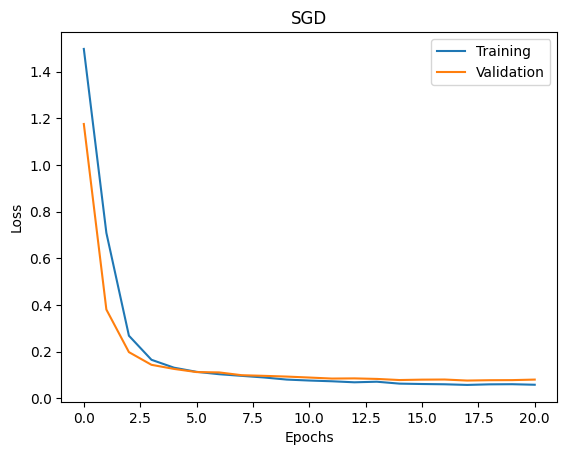

In [9]:
plt.figure()
plt.title("SGD")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend()

In [10]:
model_3.evaluate(test_data, test_labels)

119/119 [==============================] - 0s 705us/step - loss: 0.0817 - accuracy: 0.9739


[0.08169551193714142, 0.9739130139350891]

## Test

In [11]:
pred_labels = model_3.predict(test_data, verbose=1)
pred_labels = np.argmax(pred_labels, axis=1)

confusion_matrix = tf.math.confusion_matrix(test_labels, pred_labels)
print(confusion_matrix.numpy())

119/119 [==============================] - 0s 558us/step
[[742   0   3   0   0   0  10   4]
 [  0 751   5   0   0   0   1   2]
 [ 11   7 713   0   0   0  16  12]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  4   0   7   0   0   0 747   1]
 [  2   2   9   0   0   0   3 743]]
